<center> Choose Bucket using closeness centrality on descending values </center>
---

In [1]:
# First Import the libraries needed;

# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline
sns.set_style("whitegrid")
from IPython.core.display import display, HTML

import sys
sys.path.append('../../')

# proalign libraries
import string_db
import interface
import organism
import align
import constants as cs

In [2]:
# basic percent generator if is number
def as_percent(v, precision='0.2'):  
    """Convert number to percentage string."""
    try:
        return "{{:{}%}}".format(precision).format(float(v))
    except:
        return v

In [3]:
%%capture
# Initialization:

# organism names and IDs
organism_ids = ['4932', '7227', '9606']
organism_names = ['yeast', 'fly', 'human']

organism_ids = ['4932', '7227']
organism_names = ['yeast', 'fly']

# read organism PPI networks
organism_objs = [x for x in map(string_db.parse_organism, organism_ids)]

In [4]:
# a function to run an alignment and return the results (make sure to update constants if needed)
def alignment_result(orgs, align_method, similarity_mode='raw_blast'):
    # sort ids
    orgs.sort()
    
    # get Organism network objects
    orgobjs = [organism_objs[organism_ids.index(x)] for x in orgs]

    # create the combined biological alignment network
    bio_net = organism.BioNet(orgobjs[0], orgobjs[1], similarity_mode)
    
    # create aligner object
    aligner = align.Aligner(align_method)
    
    # align the networks
    aligner.align(bio_net)
    
    # create a dictionary for the results and fill
    results = {}
    results['CE'] = aligner.ce
    results['EC'] = aligner.ec
    results['LCCS'] = aligner.lccs
    results['ICS'] = aligner.ics
    results['S^3'] = aligner.s3
    # results['GOC'] = aligner.GOC
    # results['PWS1'] = aligner.PWS1
    # results['PWS2'] = aligner.PWS2
    # results['NBS'] = aligner.nbs
    results['Frobenius Norm'] = aligner.frobenius
    
    # return all results
    return results

## Algorithms Comparison:

Let's see how different algorithms score on various datasets:

---

In [5]:
%%capture
# Now that we have all required initial setups let's gather some information:

# our main algorithms constants:
cs.SEED_KEEP_RATIO = 0.3
cs.MAX_SEED_SIZE = 1400
# cs.SEED_PR_ALPHA

# algorithm selection
other_algs = ['isoN', 'NETAL', 'pinalog', 'CGRAAL', 'GRAAL', 'MIGRAAL', 'HubAlign', 'MAGNA', 'PROPER',
        'SPINAL-I', 'SPINAL-II']

other_alg_dfs = {}

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']

columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

for i1 in range(len(organism_ids)):
    for i2 in range(i1 + 1, len(organism_ids)):
        name = '{}-{}'.format(organism_names[i1], organism_names[i2])

        # organism selestion:
        orgs = [organism_ids[i1], organism_ids[i2]]

        # a list to store all data in
        data = []

        for alg in other_algs:
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=other_algs, columns=columns)
        other_alg_dfs[name] = df

In [6]:
# Or view all scores combined:

net_names = ['yeast-fly', 'yeast-human', 'fly-human']
net_names = ['yeast-fly']
pd.concat([other_alg_dfs[x] for x in net_names], axis=0, keys=net_names)

CE        EC  LCCS       ICS       S^3  Frobenius Norm
yeast-fly isoN        6990  0.509512   544  0.774429  0.443669      172.232401
          NETAL        212  0.015453    35  0.010716  0.006368      253.373242
          pinalog     9400  0.685181   731  0.561898  0.446598      165.402539
          CGRAAL      5688  0.414607   661  0.273857  0.197493      216.041663
          GRAAL       5944  0.433268   210  0.342357  0.236464      213.658606
          MIGRAAL     5925  0.431883   549  0.305870  0.218112      213.836386
          HubAlign    8605  0.627232   224  0.414319  0.332458      187.098904
          MAGNA         95  0.006925    17  0.005149  0.002962      262.766056
          PROPER     10039  0.731759   771  0.525437  0.440578      161.027948
          SPINAL-I    9690  0.706320   737  0.489147  0.406477      167.056877
          SPINAL-II   9549  0.696042   806  0.478575  0.395846      171.318417

## TopoAlign previous algorithms
---

In [7]:
%%capture
# Now that we have all required initial setups let's gather some information:

# our main algorithms constants:
cs.SEED_KEEP_RATIO = 0.3
cs.MAX_SEED_SIZE = 1400
# cs.SEED_PR_ALPHA

# algorithm selection
topo_algs = ['seedexsingle', 'seedexsingle-jac', 'seedexsingle-ada']

topo_dfs = {}

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']

columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

for i1 in range(len(organism_ids)):
    for i2 in range(i1 + 1, len(organism_ids)):
        name = '{}-{}'.format(organism_names[i1], organism_names[i2])

        # organism selestion:
        orgs = [organism_ids[i1], organism_ids[i2]]

        # a list to store all data in
        data = []

        for alg in topo_algs:
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=topo_algs, columns=columns)
        topo_dfs[name] = df

In [8]:
# Or view all scores combined:
print('Main parameteres: SEED_KEEP_RATIO: {}, BUCKET_SIZE: {}'.format(
      cs.SEED_KEEP_RATIO, cs.MAX_SEED_SIZE, cs.SEED_PR_ALPHA))

net_names = ['yeast-fly', 'yeast-human', 'fly-human']
net_names = ['yeast-fly']
pd.concat([topo_dfs[x] for x in net_names], axis=0, keys=net_names)

Main parameteres: SEED_KEEP_RATIO: 0.3, BUCKET_SIZE: 1400


CE        EC  LCCS       ICS       S^3  \
yeast-fly seedexsingle      10464  0.762738   793  0.508208  0.438834   
          seedexsingle-jac  10053  0.732779   800  0.488436  0.414591   
          seedexsingle-ada  10381  0.756688   783  0.504716  0.434242   

                            Frobenius Norm  
yeast-fly seedexsingle          166.042163  
          seedexsingle-jac      170.921034  
          seedexsingle-ada      167.038918

---

## Parameter Comparison (Organisms: Yeast-Fly)

Now Let's compare different parameters from our own algorithm:


### bucket size & keep ratio
---


In [9]:
%%capture

# list of our algorithms
our_algs = ['seedexCC', 'seedexCC-jac', 'seedexCC-ada']


# list of constants to compare:
bucket_size = [800, 1000, 1200, 1400]
keep_ratio = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
pagerank_alpha = [0.85]

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

# organism selestion:
orgs = ['4932', '7227']

alldfs1 = []

'''
for alpha in pagerank_alpha:
    cs.SEED_PR_ALPHA = alpha
    alpha_dfs = []
'''
    
for alg in our_algs:
    alg_dfs = []

    for bs in bucket_size:
        cs.MAX_SEED_SIZE = bs
        data = []

        for kr in keep_ratio:
            cs.SEED_KEEP_RATIO = kr
            aln = alignment_result(orgs, alg)
            data.append(aln)

        df = pd.DataFrame(data=data, index=['keep ratio: {}'.format(x) for x in keep_ratio], columns=columns)

        alg_dfs.append(df)

    cdfs1 = pd.concat(alg_dfs, axis=0, keys=['bucket size: {}'.format(x) for x in bucket_size])
    alldfs1.append(cdfs1)

calldfs1 = pd.concat(alldfs1, axis=0, keys=our_algs)

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(calldfs1)

CE        EC  LCCS  \
seedexCC     bucket size: 800  keep ratio: 0.1  10156  0.740287   781   
                               keep ratio: 0.2  10257  0.747649   713   
                               keep ratio: 0.3  10257  0.747649   799   
                               keep ratio: 0.4  10327  0.752752   755   
                               keep ratio: 0.5  10336  0.753408   777   
                               keep ratio: 0.6  10033  0.731322   777   
                               keep ratio: 0.7   9417  0.686420   726   
             bucket size: 1000 keep ratio: 0.1  10198  0.743349   780   
                               keep ratio: 0.2  10259  0.747795   777   
                               keep ratio: 0.3  10277  0.749107   837   
                               keep ratio: 0.4  10284  0.749617   800   
                               keep ratio: 0.5  10255  0.747503   807   
                               keep ratio: 0.6   9935  0.724178   801   
                               keep ratio: 0.7   9377  0.683505   746   
             bucket size: 1200 keep ratio: 0.1   9930  0.723814   709   
                               keep ratio: 0.2  10246  0.746847   837   
                               keep ratio: 0.3  10282  0.749472   789   
                               keep ratio: 0.4  10324  0.752533   789   
                               keep ratio: 0.5  10080  0.734747   788   
                               keep ratio: 0.6   9749  0.710620   777   
                               keep ratio: 0.7   9208  0.671186   724   
             bucket size: 1400 keep ratio: 0.1  10228  0.745535   813   
                               keep ratio: 0.2  10289  0.749982   713   
                               keep ratio: 0.3  10331  0.753043   769   
                               keep ratio: 0.4  10236  0.746119   783   
                               keep ratio: 0.5  10077  0.734529   780   
                               keep ratio: 0.6   9735  0.709600   770   
                               keep ratio: 0.7   9019  0.657409   698   
seedexCC-jac bucket size: 800  keep ratio: 0.1   9596  0.699468   784   
                               keep ratio: 0.2   9650  0.703404   797   
                               keep ratio: 0.3   9848  0.717837   847   
                               keep ratio: 0.4   9954  0.725563   800   
                               keep ratio: 0.5  10014  0.729937   790   
                               keep ratio: 0.6   9820  0.715796   857   
                               keep ratio: 0.7   9258  0.674831   727   
             bucket size: 1000 keep ratio: 0.1   9646  0.703112   871   
                               keep ratio: 0.2   9803  0.714556   781   
                               keep ratio: 0.3   9908  0.722210   822   
                               keep ratio: 0.4   9922  0.723231   812   
                               keep ratio: 0.5   9972  0.726875   817   
                               keep ratio: 0.6   9729  0.709162   802   
                               keep ratio: 0.7   9268  0.675559   743   
             bucket size: 1200 keep ratio: 0.1   9479  0.690940   854   
                               keep ratio: 0.2   9839  0.717181   821   
                               keep ratio: 0.3   9877  0.719950   800   
                               keep ratio: 0.4   9940  0.724543   806   
                               keep ratio: 0.5   9839  0.717181   804   
                               keep ratio: 0.6   9595  0.699395   792   
                               keep ratio: 0.7   9076  0.661564   724   
             bucket size: 1400 keep ratio: 0.1   9694  0.706611   832   
                               keep ratio: 0.2   9732  0.709381   785   
                               keep ratio: 0.3   9926  0.723522   796   
                               keep ratio: 0.4   9928  0.723668   806   
                               keep ratio: 0.5   9915  0.722720   801   
                               keep 



### bucket size & seed size
---

In [11]:
%%capture

# list of our algorithms
our_algs = ['seedexCC', 'seedexCC-jac', 'seedexCC-ada']

# list of constants to compare:
bucket_size = [800, 1000, 1200, 1400]
seed_size = [100, 200, 300, 400, 500, 600, 700, 800]
pagerank_alpha = [0.85]

# ignore PWS2
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'GOC', 'PWS1', 'NBS']
columns = ['CE', 'EC', 'LCCS', 'ICS', 'S^3', 'Frobenius Norm']

# organism selestion:
orgs = ['4932', '7227']

alldfs2 = []

for alpha in pagerank_alpha:
    cs.SEED_PR_ALPHA = alpha
    alpha_dfs = []
    
    for alg in our_algs:
        dfs2 = []
        for bs in bucket_size:
            cs.MAX_SEED_SIZE = bs
            data = []
            for ss in seed_size:
                cs.SEED_KEEP_RATIO = ss / bs
                aln = alignment_result(orgs, alg)
                data.append(aln)

            df = pd.DataFrame(data=data,
                              index=['seed size: {}'.format(x) for x in seed_size],
                              columns=columns)

            dfs2.append(df)

        cdfs2 = pd.concat(dfs2, axis=0, keys=['bucket size: {}'.format(x) for x in bucket_size])
        alldfs2.append(cdfs2)

calldfs2 = pd.concat(alldfs2, axis=0, keys=our_algs)

In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(calldfs2)

CE        EC  LCCS  \
seedexCC     bucket size: 800  seed size: 100  10192  0.742911   643   
                               seed size: 200  10254  0.747431   735   
                               seed size: 300  10368  0.755740   736   
                               seed size: 400  10336  0.753408   777   
                               seed size: 500   9969  0.726656   766   
                               seed size: 600   9035  0.658576   694   
                               seed size: 700   8483  0.618340   569   
                               seed size: 800   8221  0.599242   518   
             bucket size: 1000 seed size: 100  10198  0.743349   780   
                               seed size: 200  10259  0.747795   777   
                               seed size: 300  10277  0.749107   837   
                               seed size: 400  10284  0.749617   800   
                               seed size: 500  10255  0.747503   807   
                               seed size: 600   9935  0.724178   801   
                               seed size: 700   9377  0.683505   746   
                               seed size: 800   8950  0.652380   660   
             bucket size: 1200 seed size: 100  10201  0.743567   803   
                               seed size: 200  10296  0.750492   707   
                               seed size: 300  10276  0.749034   726   
                               seed size: 400  10353  0.754647   772   
                               seed size: 500  10330  0.752970   778   
                               seed size: 600  10080  0.734747   788   
                               seed size: 700   9907  0.722137   786   
                               seed size: 800   9359  0.682193   751   
             bucket size: 1400 seed size: 100   9896  0.721335   798   
                               seed size: 200  10311  0.751585   677   
                               seed size: 300  10322  0.752387   725   
                               seed size: 400  10336  0.753408   777   
                               seed size: 500  10351  0.754501   787   
                               seed size: 600  10170  0.741308   779   
                               seed size: 700  10077  0.734529   780   
                               seed size: 800   9861  0.718784   777   
seedexCC-jac bucket size: 800  seed size: 100   9788  0.713463   769   
                               seed size: 200   9713  0.707996   781   
                               seed size: 300   9935  0.724178   752   
                               seed size: 400  10014  0.729937   790   
                               seed size: 500   9815  0.715431   774   
                               seed size: 600   8968  0.653692   680   
                               seed size: 700   8423  0.613966   552   
                               seed size: 800   8136  0.593046   514   
             bucket size: 1000 seed size: 100   9646  0.703112   871   
                               seed size: 200   9803  0.714556   781   
                               seed size: 300   9908  0.722210   822   
                               seed size: 400   9922  0.723231   812   
                               seed size: 500   9972  0.726875   817   
                               seed size: 600   9729  0.709162   802   
                               seed size: 700   9268  0.675559   743   
                               seed size: 800   9040  0.658940   658   
             bucket size: 1200 seed size: 100   9679  0.705518   833   
                               seed size: 200   9553  0.696334   847   
                               seed size: 300   9870  0.719440   854   
                               seed size: 400   9873  0.719659   808   
                               seed size: 500  10018  0.730228   789   
                               seed size: 600   9839  0.717181   804   
                               seed size: 700   9691  0.706393   798   
                  

### Bucket - Keepratio Plot
---

/Users/alireza/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


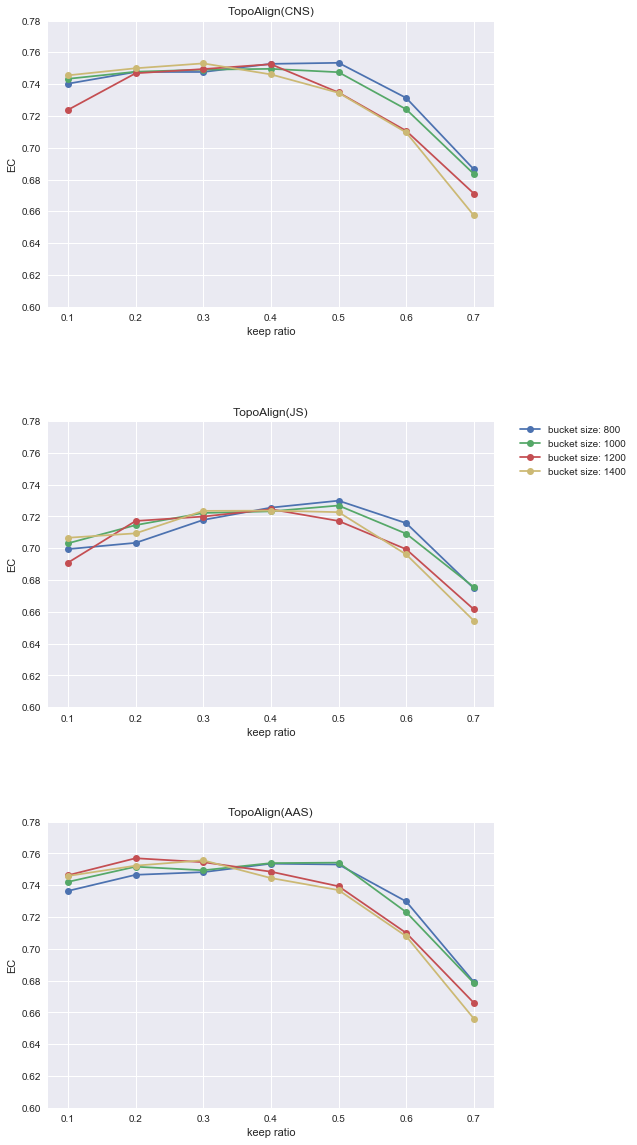

In [17]:
net_name = 'yeast-fly'

alg_names = ['TopoAlign(CNS)', 'TopoAlign(JS)', 'TopoAlign(AAS)']

# markers = ['.']*11 + ['*']*3

# colors = sns.color_palette("hls", 14)
# colors = sns.hls_palette(14, l=.4, s=.8)
# colors = sns.color_palette("husl", 14)
# colors = sns.color_palette("Dark2", 14)

fig = plt.figure(figsize=(8,20))
plt.subplots_adjust(wspace=0.3, hspace=0.4)
colors = ['b', 'g', 'r', 'y']

for i in range(3):
#     net_name = net_names[i]
    ax = fig.add_subplot(3, 1, i+1)
    x = keep_ratio
    alg = our_algs[i]
    alg_name = alg_names[i]
    color_ind = 0
    for bs in bucket_size:
        col_name = 'bucket size: {}'.format(bs)
        y = calldfs1['EC'][alg][col_name]
        ax.plot(x, y, 'o-', label=col_name, color=colors[color_ind])
        color_ind += 1
    
    ax.set_yticks(np.arange(0.6, 0.78, 0.02))
    ax.set_xlabel('keep ratio')
    ax.set_ylabel('EC')
    ax.set_title(alg_name)
    
plt.subplot(3, 1, 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("bucket-keepratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
# %config InlineBackend.figure_format = 'svg'


### Seed - Keepratio Plot
---

/Users/alireza/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


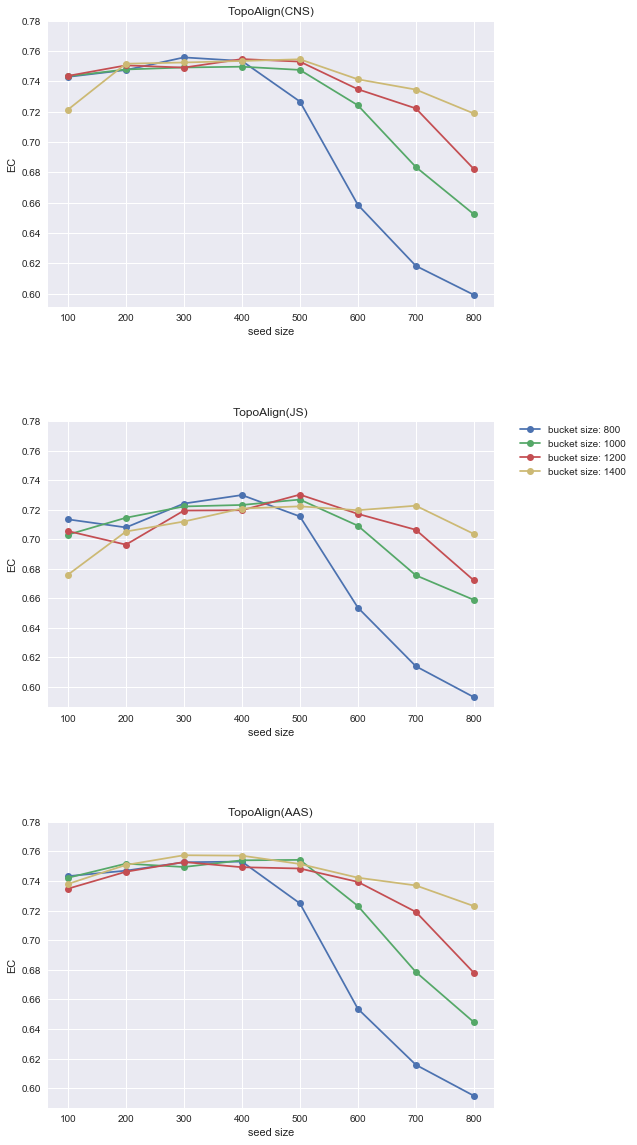

In [16]:
net_name = 'yeast-fly'

alg_names = ['TopoAlign(CNS)', 'TopoAlign(JS)', 'TopoAlign(AAS)']

# markers = ['.']*11 + ['*']*3

# colors = sns.color_palette("hls", 14)
# colors = sns.hls_palette(14, l=.4, s=.8)
# colors = sns.color_palette("husl", 14)
# colors = sns.color_palette("Dark2", 14)

colors = ['b', 'g', 'r', 'y']

fig = plt.figure(figsize=(8,20))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

for i in range(3):
#     net_name = net_names[i]
    ax = fig.add_subplot(3, 1, i+1)
    x = seed_size
    alg = our_algs[i]
    alg_name = alg_names[i]
    color_ind = 0
    for bs in bucket_size:
        col_name = 'bucket size: {}'.format(bs)
        y = calldfs2['EC'][alg][col_name]
        ax.plot(x, y, 'o-', label=col_name, color=colors[color_ind])
        color_ind += 1
    
    ax.set_yticks(np.arange(0.6, 0.78, 0.02))
    ax.set_xlabel('seed size')
    ax.set_ylabel('EC')
    ax.set_title(alg_name)

plt.subplot(3, 1, 2)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.savefig("seed-keepratio.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
# %config InlineBackend.figure_format = 'svg'

## Closeness Centrality - Node Degree Plot
---

In [8]:
%%capture
# create the combined biological alignment network
bio_net = organism.BioNet(organism_objs[0], organism_objs[1], 'raw_blast')

G1 = nx.Graph()
G1.add_nodes_from(range(bio_net.org1.node_count))
G1.add_edges_from(bio_net.org1.edges)

G2 = nx.Graph()
G2.add_nodes_from(range(bio_net.org2.node_count))
G2.add_edges_from(bio_net.org2.edges)

CC1 = nx.closeness_centrality(G1).items()
CC2 = nx.closeness_centrality(G2).items()

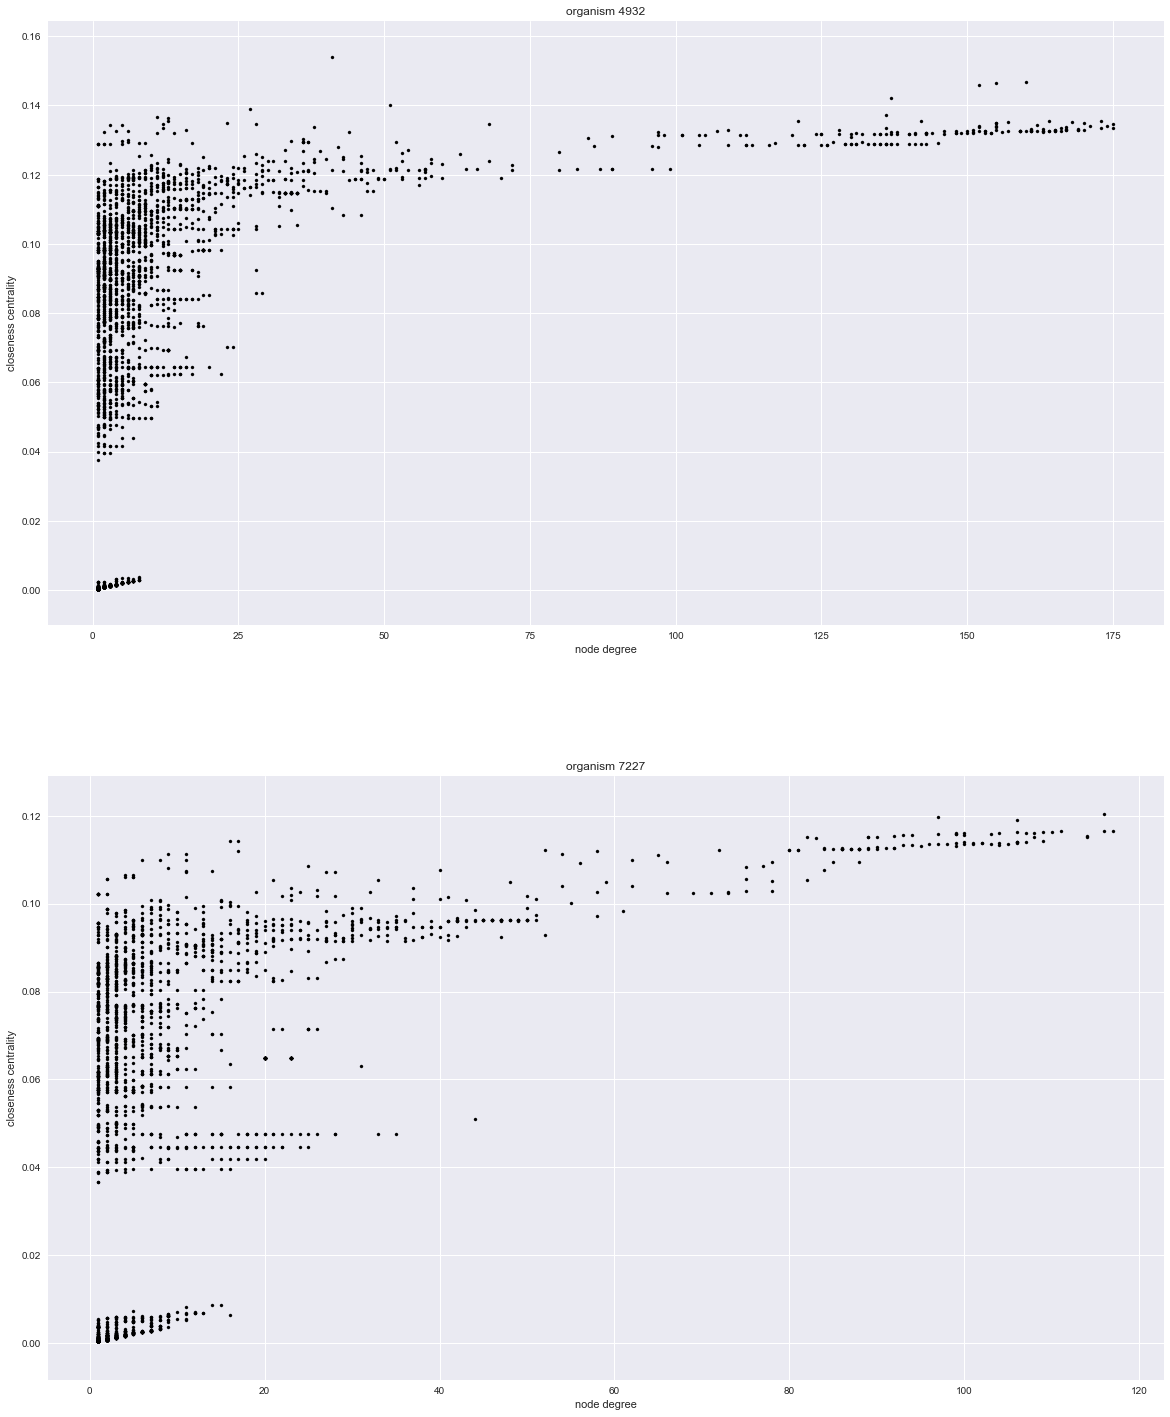

In [18]:
DEG1, VAL1 = [], []
for node, value in CC1:
    DEG1.append(bio_net.org1.degree[node])
    VAL1.append(value)

DEG2, VAL2 = [], []
for node, value in CC2:
    DEG2.append(bio_net.org2.degree[node])
    VAL2.append(value)

colors = (0, 0, 0)
area = np.pi*3

plt.subplot(211)
plt.scatter(DEG1, VAL1, s=area, c=colors)

plt.title('organism 4932')
plt.ylabel('closeness centrality')
plt.xlabel('node degree')


plt.subplot(212)
plt.scatter(DEG2, VAL2, s=area ,c=colors)
plt.rcParams["figure.figsize"] = [18, 25]

plt.title('organism 7227')
plt.ylabel('closeness centrality')
plt.xlabel('node degree')


plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.savefig("cc-degree.pdf", bbox_inches='tight')
plt.show()